# Local Sequence Alignment

We can align similar motifs in two sequences to each other with a dynamic programming approach.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sequence_alignment as seq

We start off with linear gap penalties and modify the approach to incorporate affine gap penalties. Let's define two sequences:

In [2]:
seq_2 = "ACACCTT"
seq_1 = "CCC"

## 1. Initialization
The initialized scoring matrix $M$ contains $0\ \forall\ i,j$ 

In [3]:
g = -1

In [4]:
#initialize the scoring matrix
m = len(seq_1); n = len(seq_2)
M = np.zeros([m+1,n+1])

## 2. Fill Step

The recursion relationship is modified as follows:

$$ M_{i,j} = \max \{ (M_{i-1,j-1} + S_{i,j}), \ (M_{i-1,j} + g), \ (M_{i,j-1} + g),\ 0 \} $$

where $M$ is the scoring matrix, $S$ is the substitution matrix and $g$ is the gap penalty. 

Let's define a substitution matrix:

In [5]:
S = pd.read_csv('dna_identity.csv',index_col=0)
S[S==1] = 2
S[S==0] = -1
S

,A,G,C,T
A,2.0,-1.0,-1.0,-1.0
G,-1.0,2.0,-1.0,-1.0
C,-1.0,-1.0,2.0,-1.0
T,-1.0,-1.0,-1.0,2.0


In [6]:
tracer = np.zeros([np.shape(M)[0],np.shape(M)[1],3])
for i in range(1,m+1):
    for j in range(1,n+1):
        arr = np.array([M[i-1,j-1]+(S[seq_1[i-1]][seq_2[j-1]]),(M[i-1,j]+g),(M[i,j-1]+g)])
        M[i,j] = np.max(np.hstack([arr,0]))
        idx = np.where(arr==np.max(arr))*int(M[i,j]!=0)
        tracer[i,j,idx] = 1

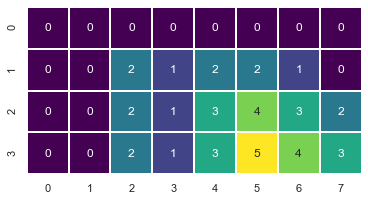

In [7]:
sns.heatmap(M,linecolor='white',linewidth=1,cmap="viridis",square=True,annot=True,cbar=False);

Let's visualize the traceback matrices:

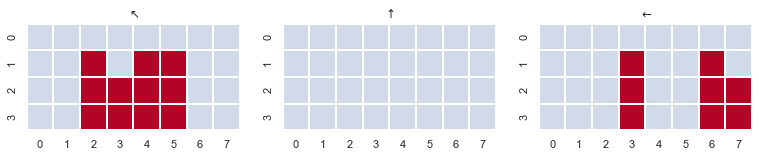

In [8]:
fig, ax = plt.subplots(1,3,figsize = (13,6))
for i,p in enumerate([r"$\nwarrow$",r"$\uparrow$",r"$\leftarrow$"]):
        sns.heatmap(tracer[:,:,i],linecolor='white',linewidth=1,
                    cmap="coolwarm",vmin=-0.5,vmax=0.6,square=True,cbar=False,ax=ax[i]);
        ax[i].set_title(p)

## 3. Traceback

The traceback function has to be modified to start at the element with the highest score. We terminate the traceback when $M_{(i,j)} = 0$. Therefore, we need both the `tracer` matrix as well as $M$ to determine stop location.

In [9]:
alignment = seq.traceback_iterator(tracer,seq_1,seq_2,mat=M,local=True)
for i,e in enumerate(alignment):
    print(str(i+1)+".","\n",e[0],"\n",e[1],"\n")

1. 
 -C-CC-- 
 ACACCTT 



For the above two sequences, the `CACC` motif is aligned to `C-CC` motif.

## 4. Example Alignments

As usual, let's align more sequences

### 1.

In [10]:
seq_1 = "ATCCCCGGGGGGGCT"
seq_2 = "AT"

S = pd.read_csv('dna_transition_transversion.csv',index_col=0)
g = -6

In [11]:
_,_,_ = seq.local_dp(seq_1,seq_2,S,g,disp_alignments = True)

Max. score = 4.0
1. 
 ATCCCCGGGGGGGCT 
 AT------------- 



### 2. 

In [12]:
seq_2 = "AAATTGCGCAAAATCTACTACGCGCGCGA"
seq_1 = "AAATTGCGCAAAATCTTACGCGCCCTACGCGA"

S = pd.read_csv('dna_transition_transversion.csv',index_col=0)
g = -6

In [13]:
_,_,_ = seq.local_dp(seq_1,seq_2,S,g,disp_alignments = True)

Max. score = 34.0
1. 
 AAATTGCGCAAAATCT--TACGCGCCCTACGCGA 
 AAATTGCGCAAAATCTACTACGCGCGCGA----- 



### 3.

In [14]:
seq_2 = "KMNPHGHGHG"
seq_1 = "HG"

S = pd.read_csv('blosum62.csv',index_col=0)
g = -6

In [15]:
_,_,_ = seq.local_dp(seq_1,seq_2,S,g,disp_alignments = True)

Max. score = 14.0
1. 
 ------HG-- 
 KMNPHGHGHG 

2. 
 --------HG 
 KMNPHGHGHG 

3. 
 ----HG---- 
 KMNPHGHGHG 

